In [ ]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/Mafu 4.csv")

In [3]:
data.shape

(5396, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Holati                                                    5396 non-null   object
 1   Yaratilish sanasi                                         5396 non-null   object
 2   Olinish sanasi                                            4145 non-null   object
 3   Buyurtma raqami                                           5396 non-null   int64 
 4   Shtrixkod                                                 5396 non-null   int64 
 5   SKU                                                       5396 non-null   object
 6   Nomi                                                      5396 non-null   object
 7   Turkumi                                                   5396 non-null   object
 8   Soni                        

In [5]:
data.isnull().sum()

,0
Holati,0
Yaratilish sanasi,0
Olinish sanasi,1251
Buyurtma raqami,0
Shtrixkod,0
SKU,0
Nomi,0
Turkumi,0
Soni,0
Qaytarishlar,0


In [7]:
bosh=data.isnull().mean()*100
bosh

,0
Holati,0.00000
Yaratilish sanasi,0.00000
Olinish sanasi,23.18384
Buyurtma raqami,0.00000
Shtrixkod,0.00000
SKU,0.00000
Nomi,0.00000
Turkumi,0.00000
Soni,0.00000
Qaytarishlar,0.00000


In [8]:
kerakmas=["Holati", "Yaratilish sanasi", "Olinish sanasi", "Buyurtma raqami", "Promokod (soʻm)"]
data.drop(columns=kerakmas, inplace=True)

In [9]:
data.columns

Index(['Shtrixkod', 'SKU', 'Nomi', 'Turkumi', 'Soni', 'Qaytarishlar',
       'Tushim (soʻm)',
       'Komissiya va logistika chiqarib tashlangan tushim (soʻm)',
       'Marketpleys komissiyasi (soʻm)', 'Narxi (soʻm)', 'Tannarxi (soʻm)',
       'Logistika to'lovi'],
      dtype='object')

In [24]:
data.dtypes

,0
Shtrixkod,int64
SKU,object
Nomi,object
Turkumi,object
Soni,int64
Qaytarishlar,int64
Tushim (soʻm),int64
Komissiya va logistika chiqarib tashlangan tushim (soʻm),float64
Marketpleys komissiyasi (soʻm),float64
Narxi (soʻm),float64


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SKU_encoded'] = le.fit_transform(data['SKU'])
data['Nomi_encoded'] = le.fit_transform(data['Nomi'])
data['Turkumi_encoded'] = le.fit_transform(data['Turkumi'])



In [26]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [29]:
corr_matrix = data[numeric_cols].corr()
print(corr_matrix['Tushim (soʻm)'].sort_values(ascending=False))

Tushim (soʻm)                                               1.000000
Komissiya va logistika chiqarib tashlangan tushim (soʻm)    0.998407
Marketpleys komissiyasi (soʻm)                              0.977507
Tannarxi (soʻm)                                             0.732156
Narxi (soʻm)                                                0.728874
Logistika to'lovi                                           0.538928
Nomi_encoded                                                0.303531
Turkumi_encoded                                             0.220246
Soni                                                        0.050086
Shtrixkod                                                  -0.171024
SKU_encoded                                                -0.243545
Qaytarishlar                                               -0.319448
Name: Tushim (soʻm), dtype: float64


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

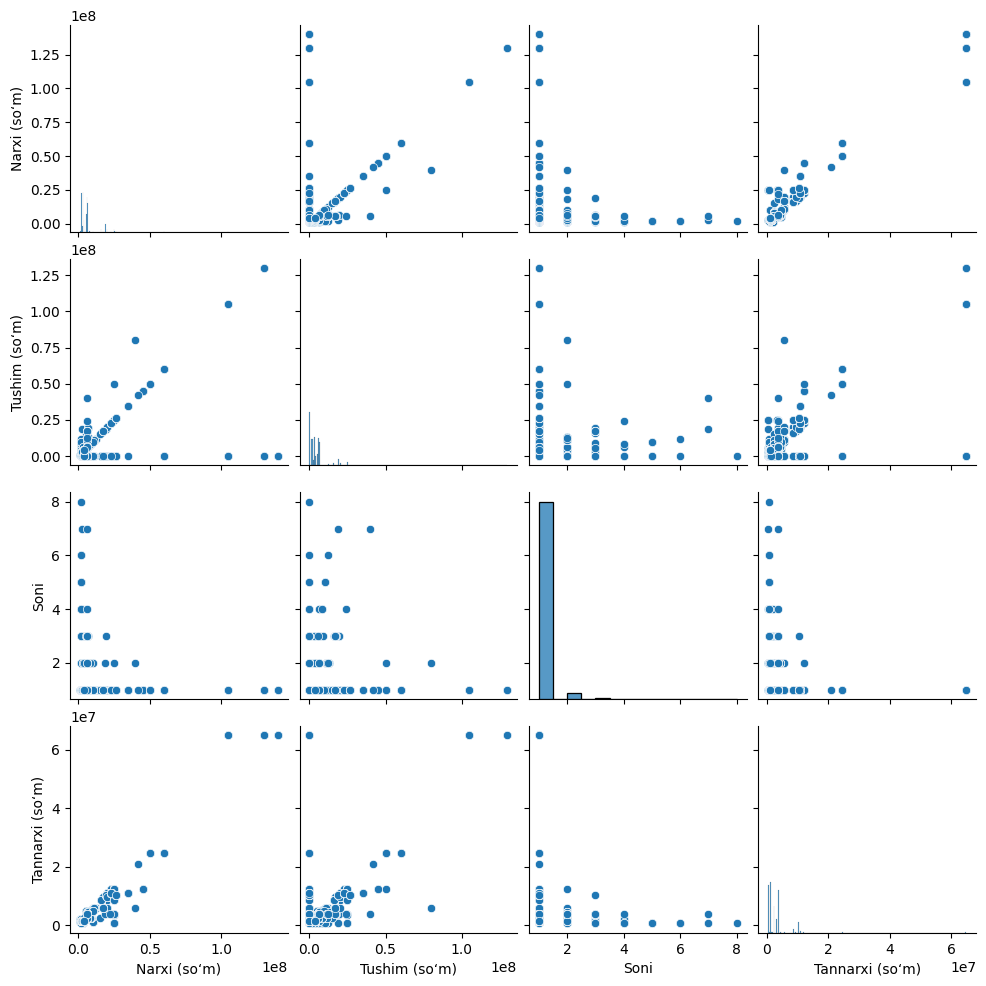

In [32]:
sns.pairplot(data[['Narxi (soʻm)', 'Tushim (soʻm)', 'Soni', 'Tannarxi (soʻm)']])
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder

for col in ['SKU', 'Nomi', 'Turkumi']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y = data['Tushim (soʻm)']

X = data.drop(columns=['Tushim (soʻm)', 'SKU', 'Nomi', 'Turkumi'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


RMSE: 259133.99890228763
R2 Score: 0.9992525098021064
